In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"
Milan['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['host_response_rate'].max()
Min = Milan['host_response_rate'].min()
Limites = [Min, Max]
Limites

[0.46, 1.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.54

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.03478366287069978

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0.46, 1, 16)
intervalos

array([0.46 , 0.496, 0.532, 0.568, 0.604, 0.64 , 0.676, 0.712, 0.748,
       0.784, 0.82 , 0.856, 0.892, 0.928, 0.964, 1.   ])

In [10]:
# Creamos las categorias

categorias = [
    "Sin respuesta",
    "Muy baja respuesta",
    "Baja respuesta",
    "Respuesta mínima",
    "Respuesta limitada",
    "Respuesta moderada",
    "Respuesta estándar",
    "Buena respuesta",
    "Respuesta alta",
    "Respuesta muy alta",
    "Casi siempre responde",
    "Respuesta máxima",
    "Respuesta potencial",
    "Respuestas consistentes",
    "Respuesta rapida"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['host_response_rate'] = pd.cut ( x = Milan ['host_response_rate'], bins = intervalos, labels = categorias )
Milan['host_response_rate']

0        Respuestas consistentes
1               Respuesta rapida
2               Respuesta rapida
3        Respuestas consistentes
4        Respuestas consistentes
                  ...           
23700    Respuestas consistentes
23701           Respuesta rapida
23702           Respuesta rapida
23703           Respuesta rapida
23704           Respuesta rapida
Name: host_response_rate, Length: 23705, dtype: category
Categories (15, object): ['Sin respuesta' < 'Muy baja respuesta' < 'Baja respuesta' < 'Respuesta mínima' ... 'Respuesta máxima' < 'Respuesta potencial' < 'Respuestas consistentes' < 'Respuesta rapida']

In [12]:
table1 = freq_tbl(Milan['host_response_rate'])
table1

,host_response_rate,frequency,percentage,cumulative_perc
0,Respuesta rapida,16662,0.702890,0.702919
1,Respuestas consistentes,5146,0.217085,0.920013
2,Respuesta potencial,604,0.025480,0.945494
3,Respuesta máxima,274,0.011559,0.957054
4,Muy baja respuesta,200,0.008437,0.965491
5,Respuesta muy alta,167,0.007045,0.972536
6,Respuesta estándar,160,0.006750,0.979286
7,Respuesta moderada,144,0.006075,0.985361
8,Casi siempre responde,120,0.005062,0.990424
9,Respuesta mínima,101,0.004261,0.994684


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_response_rate,frequency
0,Respuesta rapida,16662
1,Respuestas consistentes,5146
2,Respuesta potencial,604
3,Respuesta máxima,274
4,Muy baja respuesta,200
5,Respuesta muy alta,167
6,Respuesta estándar,160
7,Respuesta moderada,144
8,Casi siempre responde,120
9,Respuesta mínima,101


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_response_rate')
Filtro_index

,frequency
host_response_rate,
Respuesta rapida,16662
Respuestas consistentes,5146
Respuesta potencial,604
Respuesta máxima,274
Muy baja respuesta,200
Respuesta muy alta,167
Respuesta estándar,160
Respuesta moderada,144
Casi siempre responde,120


<Axes: xlabel='host_response_rate'>

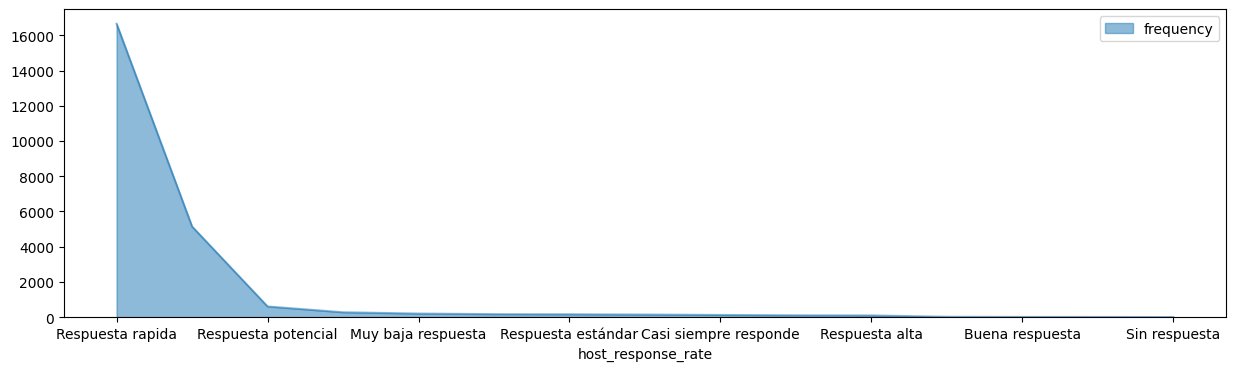

In [15]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)